In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statistics import median

%matplotlib inline

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

In [51]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.colors import LogNorm

In [3]:
boxScore = pd.read_csv("nba-enhanced-stats/2012-18_officialBoxScore.csv")
boxScore

,gmDate,gmTime,seasTyp,offLNm,offFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Smith,Michael,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
2,2012-10-30,19:00,Regular,Workman,Haywoode,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
3,2012-10-30,19:00,Regular,Brothers,Tony,CLE,East,Central,Home,Win,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
4,2012-10-30,19:00,Regular,Smith,Michael,CLE,East,Central,Home,Win,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
5,2012-10-30,19:00,Regular,Workman,Haywoode,CLE,East,Central,Home,Win,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
6,2012-10-30,20:00,Regular,McCutchen,Monty,BOS,East,Atlantic,Away,Loss,...,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
7,2012-10-30,20:00,Regular,Wright,Sean,BOS,East,Atlantic,Away,Loss,...,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
8,2012-10-30,20:00,Regular,Fitzgerald,Kane,BOS,East,Atlantic,Away,Loss,...,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
9,2012-10-30,20:00,Regular,McCutchen,Monty,MIA,East,Southeast,Home,Win,...,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832


In [4]:
playerBox = pd.read_csv("nba-enhanced-stats/2012-18_playerBoxScore.csv")
playerBox

,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,playFT%,playORB,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff
0,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,...,1.0000,1,1,2,CLE,East,Central,Home,Win,0
1,2012-10-30,19:00,Regular,Ariza,Trevor,WAS,East,Southeast,Away,Loss,...,0.5000,1,2,3,CLE,East,Central,Home,Win,0
2,2012-10-30,19:00,Regular,Okafor,Emeka,WAS,East,Southeast,Away,Loss,...,0.5000,5,2,7,CLE,East,Central,Home,Win,0
3,2012-10-30,19:00,Regular,Beal,Bradley,WAS,East,Southeast,Away,Loss,...,1.0000,0,3,3,CLE,East,Central,Home,Win,0
4,2012-10-30,19:00,Regular,Booker,Trevor,WAS,East,Southeast,Away,Loss,...,0.0000,1,0,1,CLE,East,Central,Home,Win,0
5,2012-10-30,19:00,Regular,Crawford,Jordan,WAS,East,Southeast,Away,Loss,...,0.7500,1,2,3,CLE,East,Central,Home,Win,0
6,2012-10-30,19:00,Regular,Webster,Martell,WAS,East,Southeast,Away,Loss,...,0.0000,0,3,3,CLE,East,Central,Home,Win,0
7,2012-10-30,19:00,Regular,Vesely,Jan,WAS,East,Southeast,Away,Loss,...,0.2500,3,1,4,CLE,East,Central,Home,Win,0
8,2012-10-30,19:00,Regular,Singleton,Chris,WAS,East,Southeast,Away,Loss,...,0.0000,2,2,4,CLE,East,Central,Home,Win,0
9,2012-10-30,19:00,Regular,Barron,Earl,WAS,East,Southeast,Away,Loss,...,0.0000,4,4,8,CLE,East,Central,Home,Win,0


In [5]:
teamBox = pd.read_csv("nba-enhanced-stats/2012-18_teamBoxScore.csv")
teamBox

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,WAS,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,CLE,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
2,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,BOS,...,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
3,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,MIA,...,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832
4,2012-10-30,22:30,Regular,Foster,Scott,Zielinski,Gary,Dalen,Eric,DAL,...,58.6458,99.3678,108.1034,-8.7356,0.5000,18.6567,1.7143,42.8571,91.5790,91.5790
5,2012-10-30,22:30,Regular,Foster,Scott,Zielinski,Gary,Dalen,Eric,LAL,...,60.2083,108.1034,99.3678,8.7356,0.4545,17.3338,1.8333,75.0000,91.5790,91.5790
6,2012-10-31,19:00,Regular,Salvatore,Bennett,Brown,Tony,Lewis,Eric,DEN,...,58.4375,89.0099,79.4731,9.5368,0.3448,14.0362,1.1250,81.2500,94.3715,94.3715
7,2012-10-31,19:00,Regular,Salvatore,Bennett,Brown,Tony,Lewis,Eric,PHI,...,41.1458,79.4731,89.0099,-9.5368,0.3511,14.1961,0.8636,40.9091,94.3715,94.3715
8,2012-10-31,19:00,Regular,Spooner,Bill,Guthrie,David,Lindsay,Mark,IND,...,55.7292,96.1075,98.2918,-2.1843,0.3837,14.1332,1.8000,120.0000,91.5641,91.5641
9,2012-10-31,19:00,Regular,Spooner,Bill,Guthrie,David,Lindsay,Mark,TOR,...,58.5417,98.2918,96.1075,2.1843,0.4205,17.4548,1.1579,15.7895,91.5641,91.5641


In [6]:
home_away = boxScore[['teamAbbr', 'opptAbbr', 'teamLoc', 'teamPTS', 'opptPTS']]
ptDiff = list(home_away['teamPTS'] - home_away['opptPTS'])
home_away['ptDiff'] = ptDiff
home_away


/Users/jjsahabu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,teamAbbr,opptAbbr,teamLoc,teamPTS,opptPTS,ptDiff
0,WAS,CLE,Away,84,94,-10
1,WAS,CLE,Away,84,94,-10
2,WAS,CLE,Away,84,94,-10
3,CLE,WAS,Home,94,84,10
4,CLE,WAS,Home,94,84,10
5,CLE,WAS,Home,94,84,10
6,BOS,MIA,Away,107,120,-13
7,BOS,MIA,Away,107,120,-13
8,BOS,MIA,Away,107,120,-13
9,MIA,BOS,Home,120,107,13


In [7]:
home_away['ptDiff'].groupby(home_away['teamLoc']).mean()

teamLoc
Away   -2.691762
Home    2.691762
Name: ptDiff, dtype: float64

In [8]:
home_away_means = home_away['ptDiff'].groupby((home_away['teamLoc'], home_away['teamAbbr'])).mean()
home_away_means

/Users/jjsahabu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


teamLoc  teamAbbr
Away     ATL         -1.337398
         BKN         -4.947154
         BOS         -1.333333
         CHA         -4.478969
         CHI         -2.837618
         CLE         -1.480379
         DAL         -2.861976
         DEN         -3.695122
         DET         -4.674797
         GS           4.036585
         HOU          1.700542
         IND         -1.689796
         LAC          1.808943
         LAL         -8.159675
         MEM         -2.166667
         MIA         -0.292683
         MIL         -4.154472
         MIN         -4.422192
         NO          -4.203252
         NY          -5.178862
         OKC          1.317073
         ORL         -7.378049
         PHI         -7.857724
         PHO         -6.800813
         POR         -2.066306
         SA           3.967480
         SAC         -6.621951
         TOR          1.174797
         UTA         -2.983740
         WAS         -3.126016
Home     ATL          2.223577
         BKN         

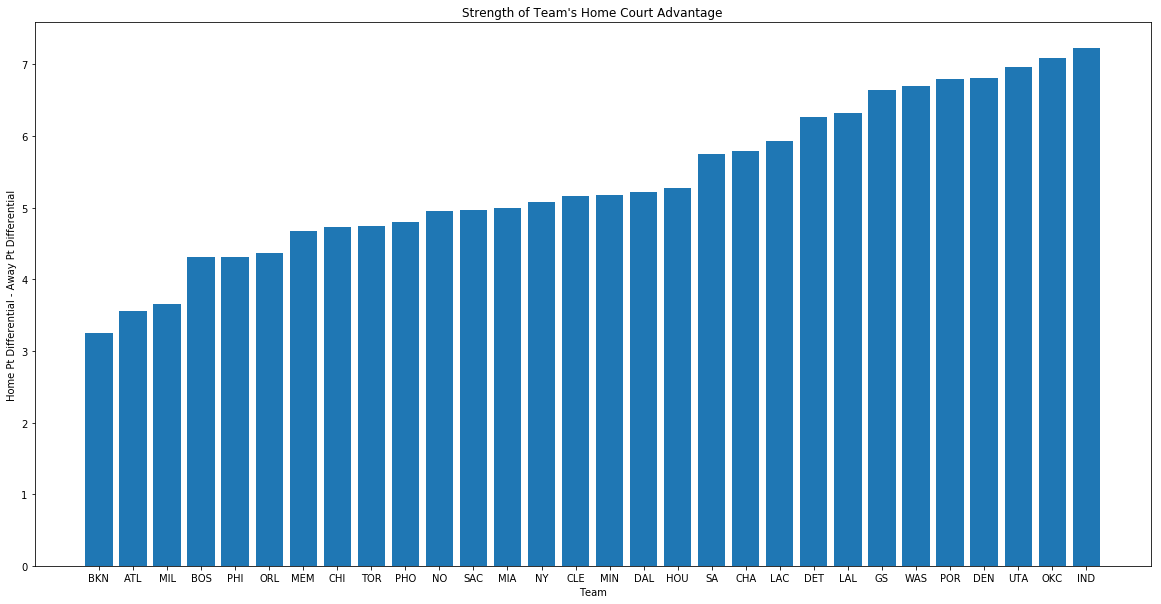

In [9]:
team_names = sorted(home_away['teamAbbr'].unique())
HADiff = {}
for i in range(30):
    HADiff[team_names[i]] = home_away_means[30 + i] - home_away_means[i]
    
sorted_list_HADiff = sorted(HADiff.items(), key = lambda kv:kv[1])

fig = plt.figure(figsize=(20,10))
ax = plt.axes()

plt.bar(range(30), [val[1] for val in sorted_list_HADiff], align='center')
plt.xticks(range(30), [val[0] for val in sorted_list_HADiff])
plt.title("Strength of Team's Home Court Advantage")
plt.xlabel("Team")
plt.ylabel("Home Pt Differential - Away Pt Differential")
plt.show()

In [10]:
#Show some way that refs impact score

#table with teams, opponent, points scored, 3 refs
ref_effect = teamBox[['teamAbbr', 'opptAbbr', 'teamPTS', 'opptPTS', 'offLNm1', 'offLNm2', 'offLNm3']]

#add pt differential
ref_ptDiff = list(teamBox['teamPTS'] - teamBox['opptPTS'])
ref_effect['ptDiff'] = ref_ptDiff

/Users/jjsahabu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
#find median pt differential for each team, head ref
ref_medians = ref_effect['ptDiff'].groupby((ref_effect['teamAbbr'], ref_effect['offLNm1'])).median()

#get the team names in a list
team_names = sorted(ref_effect['teamAbbr'].unique())

/Users/jjsahabu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


Below are 30 plots, one for each team. Each bar represents the median point differential for games played by that team with each head official. For upcoming exploration of this data we will look for trends in teams' point differentials for refs with a minimum number of games officiated for that team and perhaps with a maximum point differential (since officiating has more consequential impact on the result of close games). 

In terms of how reffing will contribute as a feature in our game prediction model: some refs may, for some reason or other, officiate in a way that increases or decreases the number of points scored/scored on by a team, i.e. favoritism for or against a team.

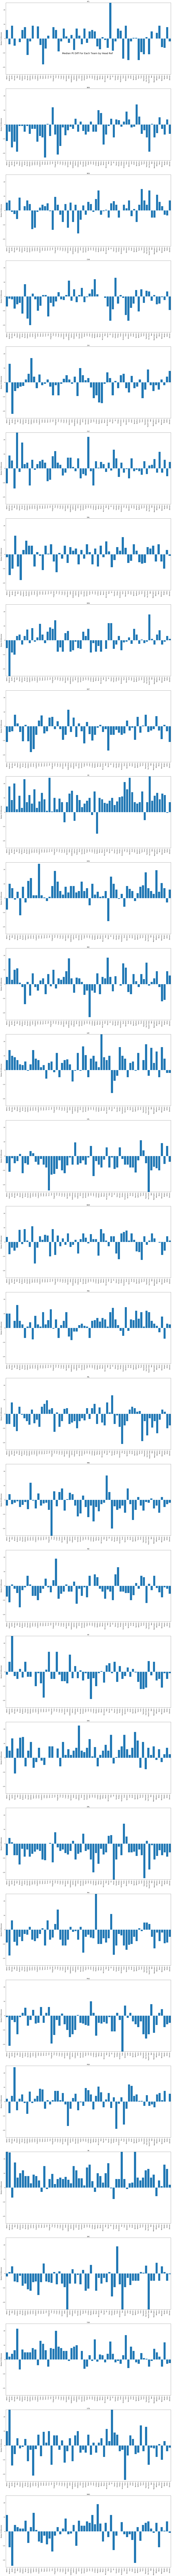

In [12]:
fig = plt.figure(figsize=(20,300))
ax = plt.axes()
fig.tight_layout()
fig.suptitle('Median Pt Diff For Each Team by Head Ref', fontsize=20)

for i in range(30):
    n = 0
    team = team_names[i]
    team_refs_list = [] #list of median point differentials
    plt.subplot(30,1,i+1)
    while n < len(ref_medians[team]):
        team_refs_list.append( ref_medians[team][n] ) #append to list the next median pt diff
        n += 1
    num_refs = len(ref_medians[team]) #each team has diff number of unique refs
    plt.bar( range(num_refs) , team_refs_list, align='center') #number of refs = number of bars; plot point diffs
    plt.title(team) 
    plt.ylabel("Median Pt Differential")
    plt.xticks(range(num_refs), ref_medians[team].keys(), rotation = 'vertical') #choose ref names 
    plt.ylim(-25,25)
    plt.margins(0)
    
plt.show()

### Scheduling / Momentum

In [13]:
#Pulling in Schedules per Season
season_1 = pd.read_csv("12_13_nba_regular_season_sched.csv")
season_2 = pd.read_csv("13_14_nba_regular_season_sched.csv")
season_3 = pd.read_csv("13_14_nba_regular_season_sched.csv")
season_4 = pd.read_csv("14_15_nba_regular_season_sched.csv")
season_5 = pd.read_csv("15_16_nba_regular_season_sched.csv")
season_6 = pd.read_csv("16_17_nba_regular_season_sched.csv")
season_7 = pd.read_csv("17_18_nba_regular_season_sched.csv")

season_1 = season_1.rename(columns={"PTS": "away_pts", "PTS.1": "home_pts", })
season_2 = season_2.rename(columns={"PTS": "away_pts", "PTS.1": "home_pts", })
season_3 = season_3.rename(columns={"PTS": "away_pts", "PTS.1": "home_pts", })
season_4 = season_4.rename(columns={"PTS": "away_pts", "PTS.1": "home_pts", })
season_5 = season_5.rename(columns={"PTS": "away_pts", "PTS.1": "home_pts", })
season_6 = season_6.rename(columns={"PTS": "away_pts", "PTS.1": "home_pts", })
season_7 = season_7.rename(columns={"PTS": "away_pts", "PTS.1": "home_pts", })
label = []
for i in range(len(season_1)):
    label.append("season 1")
for i in range(len(season_2)):
    label.append("season 2")
for i in range(len(season_3)):
    label.append("season 3")
for i in range(len(season_4)):
    label.append("season 4")
for i in range(len(season_5)):
    label.append("season 5")
for i in range(len(season_6)):
    label.append("season 6")
for i in range(len(season_7)):
    label.append("season 7")

nba_schedule = pd.concat([season_1, season_2, season_3, season_4, season_5, season_6, season_7])
nba_schedule = nba_schedule.reset_index(drop=True)

In [14]:
year = []
for i in range(len(nba_schedule)):
    year.append(nba_schedule.Date[i][-4:])
nba_schedule["Year"] = year
nba_schedule["Season"] = label
nba_schedule.head()




,Date,Start (ET),Visitor/Neutral,away_pts,Home/Neutral,home_pts,Unnamed: 6,Unnamed: 7,Attend.,Notes,Year,Season
0,Tue Oct 30 2012,7:00p,Washington Wizards,84,Cleveland Cavaliers,94,Box Score,NaN,20562,NaN,2012,season 1
1,Tue Oct 30 2012,8:00p,Boston Celtics,107,Miami Heat,120,Box Score,NaN,20296,NaN,2012,season 1
2,Tue Oct 30 2012,10:30p,Dallas Mavericks,99,Los Angeles Lakers,91,Box Score,NaN,18997,NaN,2012,season 1
3,Wed Oct 31 2012,7:00p,Indiana Pacers,90,Toronto Raptors,88,Box Score,NaN,19800,NaN,2012,season 1
4,Wed Oct 31 2012,7:00p,Denver Nuggets,75,Philadelphia 76ers,84,Box Score,NaN,19101,NaN,2012,season 1


In [15]:
nba_schedule = nba_schedule[["Date", "Visitor/Neutral", "away_pts", "Home/Neutral", "home_pts", "Year", "Season" ]]
nba_schedule.head()

,Date,Visitor/Neutral,away_pts,Home/Neutral,home_pts,Year,Season
0,Tue Oct 30 2012,Washington Wizards,84,Cleveland Cavaliers,94,2012,season 1
1,Tue Oct 30 2012,Boston Celtics,107,Miami Heat,120,2012,season 1
2,Tue Oct 30 2012,Dallas Mavericks,99,Los Angeles Lakers,91,2012,season 1
3,Wed Oct 31 2012,Indiana Pacers,90,Toronto Raptors,88,2012,season 1
4,Wed Oct 31 2012,Denver Nuggets,75,Philadelphia 76ers,84,2012,season 1


In [16]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [17]:
#Storing DataFrames in Separate Dicts
team_names = list(teamBox.teamAbbr.unique())
team_dict = { i : 0 for i in team_names }

In [61]:
#Parsing Data and Finding Consequetive Away Games
teams = teamBox[["teamAbbr", "teamAbbr", "teamLoc", "teamRslt", "gmDate"]]
teams.columns = ["groups", "teamAbbr", "teamLoc", "teamRslt", "gmDate"]

#Grouping Data by Team
sorted_teams = teams.groupby('groups')
sorted_teams.first()

#Finding Consequetive Away Games
for teams in team_names:
    temp = sorted_teams.get_group(teams)
    temp = temp.reset_index()
    Counter = 0
    for ind, row in temp.iterrows():
        if row['teamLoc'] == "Away":
            Counter += 1
            temp.loc[ind, "Consequetive Away Games"] = Counter
        else:
            Counter = 0
            temp.loc[ind, "Consequetive Away Games"] = Counter
    team_dict[teams] = temp
    
#Finding Number of Wins in Past 10 Games

    for ind in temp.index:
        if ind < 10:
            Counter = 0
            for x in range(ind):
                if temp['teamRslt'][x] == "Win":
                    Counter += 1
            temp.loc[ind, "Wins in Last 10"] = Counter
        else:
            Counter = 0
            for x in range(ind-10,ind):
                if temp['teamRslt'][x] == "Win":
                    Counter += 1
            temp.loc[ind, "Wins in Last 10"] = Counter

#Combining the Tables 
final_1 = pd.concat([team_dict['ATL'], team_dict['BKN'], team_dict['BOS'], team_dict['CHA'], team_dict['CHI'], team_dict['CLE'], team_dict['DAL'], team_dict['DEN'], team_dict['DET'], team_dict['GS']], ignore_index=True)
final_2 = pd.concat([team_dict['HOU'], team_dict['IND'], team_dict['LAC'], team_dict['LAL'], team_dict['MEM'], team_dict['MIA'], team_dict['MIL'], team_dict['MIN'], team_dict['NO'], team_dict['NY']], ignore_index=True)
final_3 = pd.concat([team_dict['OKC'], team_dict['ORL'], team_dict['PHI'], team_dict['PHO'], team_dict['POR'], team_dict['SA'], team_dict['SAC'], team_dict['TOR'], team_dict['UTA'], team_dict['WAS']], ignore_index=True)

final = pd.concat([final_1, final_2, final_3], ignore_index=True)

final = final.sort_values('index')
final = final.set_index('index')

In [95]:
#Color Scheme

for ind, row in final.iterrows():
    if row["teamRslt"] == "Win":
        final.loc[ind, "Color Scheme"] = 0
    else:
        final.loc[ind, "Color Scheme"] = 1

# Consecutive Away Games

In [21]:
train_data = final[['Consequetive Away Games']]
train_labels = final[["teamRslt"]]

#Splitting Data into Train / Dev Set
mini_train_data = train_data[:12898]
dev_data = train_data[12898:]
mini_train_labels = train_labels[:12898]
dev_labels = train_labels[12898:]
dev_labels = dev_labels.values.ravel()

In [22]:
#KNN Nearest Neighbors
for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(mini_train_data,mini_train_labels.values.ravel())
    train_predicted_labels = model.predict(dev_data)

    print(sum(dev_labels != train_predicted_labels) / len(dev_labels))

0.45698924731182794
0.45698924731182794
0.4956989247311828
0.4591397849462366
0.4591397849462366
0.4344086021505376
0.47096774193548385
0.4188172043010753
0.4553763440860215


In [24]:
#Logisitic Regression
lr_clf = LogisticRegression(C=1)
lr_clf.fit(mini_train_data, mini_train_labels.values.ravel())
train_predicted_labels = lr_clf.predict(dev_data)

print(sum(dev_labels != train_predicted_labels) / len(dev_labels))

0.4182795698924731


/Users/jjsahabu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Wins in last 10 Games

In [32]:
train_data = final[['Wins in Last 10']]
train_labels = final[["teamRslt"]]

#Splitting Data into Train / Dev Set
mini_train_data = train_data[:12898]
dev_data = train_data[12898:]
mini_train_labels = train_labels[:12898]
dev_labels = train_labels[12898:]
dev_labels = dev_labels.values.ravel()

In [33]:
#KNN Nearest Neighbors
for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(mini_train_data,mini_train_labels.values.ravel())
    train_predicted_labels = model.predict(dev_data)

    print(sum(dev_labels != train_predicted_labels) / len(dev_labels))

0.47795698924731184
0.5129032258064516
0.46344086021505376
0.4806451612903226
0.47795698924731184
0.46182795698924733
0.48333333333333334
0.47795698924731184
0.47795698924731184


In [34]:
#Logisitic Regression
lr_clf = LogisticRegression(C=1)
lr_clf.fit(mini_train_data, mini_train_labels.values.ravel())
train_predicted_labels = lr_clf.predict(dev_data)

print(sum(dev_labels != train_predicted_labels) / len(dev_labels))

0.40161290322580645


/Users/jjsahabu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Combined

In [48]:
train_data = final[['Consequetive Away Games','Wins in Last 10']]
train_labels = final[["teamRslt"]]

#Splitting Data into Train / Dev Set
mini_train_data = train_data[:12898]
dev_data = train_data[12898:]
mini_train_labels = train_labels[:12898]
dev_labels = train_labels[12898:]
dev_labels = dev_labels.values.ravel()


In [47]:
#KNN Nearest Neighbors
for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(mini_train_data, mini_train_labels.values.ravel())
    train_predicted_labels = model.predict(dev_data)

    print(sum(dev_labels != train_predicted_labels) / len(dev_labels))

0.45698924731182794
0.4381720430107527
0.439247311827957
0.43655913978494626
0.3946236559139785
0.4064516129032258
0.4032258064516129
0.3865591397849462
0.40376344086021504


In [50]:
#Logisitic Regression
lr_clf = LogisticRegression(C=1)
lr_clf.fit(mini_train_data, mini_train_labels.values.ravel())
train_predicted_labels = lr_clf.predict(dev_data)

print(sum(dev_labels != train_predicted_labels) / len(dev_labels))

train_predicted_labels

0.3903225806451613


/Users/jjsahabu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array(['Loss', 'Win', 'Win', ..., 'Win', 'Win', 'Loss'], dtype=object)

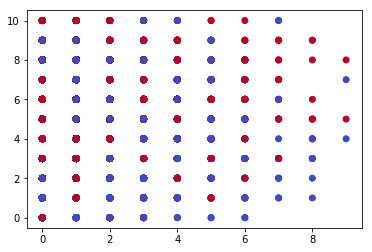

In [96]:
plt.scatter(final['Consequetive Away Games'],final['Wins in Last 10'], c=final['Color Scheme'], cmap=plt.cm.coolwarm_r)

In [106]:
ATL = team_dict['ATL']
Counter = 0 
for ind, row in ATL.iterrows():
    if row['teamRslt'] == "Win":
        Counter += 1
        temp.loc[ind, "Win Streak"] = Counter
    else:
        Counter = 0
        temp.loc[ind, "Consequetive Away Games"] = Counter
    team_dict[teams] = temp
    

,index,teamAbbr,teamLoc,teamRslt,gmDate,Consequetive Away Games,Wins in Last 10
0,35,ATL,Home,Loss,2012-11-02,0.0,0.0
1,76,ATL,Away,Win,2012-11-04,1.0,0.0
2,107,ATL,Home,Win,2012-11-07,0.0,1.0
3,139,ATL,Home,Loss,2012-11-09,0.0,2.0
4,178,ATL,Away,Loss,2012-11-11,1.0,2.0
5,200,ATL,Away,Win,2012-11-12,2.0,2.0
6,230,ATL,Away,Loss,2012-11-14,3.0,3.0
7,252,ATL,Away,Win,2012-11-16,4.0,3.0
8,295,ATL,Home,Win,2012-11-19,0.0,4.0
9,325,ATL,Home,Win,2012-11-21,0.0,5.0
